In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [20]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [21]:
X = data.data

In [22]:
y = data.target

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [24]:
from sklearn.linear_model import LinearRegression
L= LinearRegression()

In [25]:
L.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = L.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score' ,r2_score(y_test, y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.7395400804771065
RMSE 0.2461821119487648


In [54]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.01)

In [55]:
R.fit(X_train, y_train)

Ridge(alpha=0.01)

In [56]:
y_pred1 = R.predict(X_test)

In [57]:
print('R2 score',r2_score(y_test, y_pred1))
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred1)))

R2 score 0.7443570190183331
RMSE 0.243895045785303


In [58]:
print(R.coef_)
print(R.intercept_)

[ 1.39540407e-01 -8.86586977e-03 -4.33974309e-03 -7.22434426e-04
  3.06613558e-01  2.85802501e+00 -1.34605128e+00 -1.97430606e+00
 -2.91168660e-01  2.26642147e-01 -7.12570298e-02 -1.08965427e-02
 -1.59744460e-03 -1.28358949e-04 -2.41088836e+00 -9.03808796e-01
  2.17630440e+00 -1.74138636e+00 -2.35027700e+00 -2.48818443e-01
 -2.24871606e-01 -4.33121733e-03  3.02961426e-03  1.18248519e-03
 -1.80067175e+00 -5.67926267e-02 -1.69656684e-01 -9.91847879e-01
 -4.94120213e-01 -1.78833767e+00]
2.8329490503354204


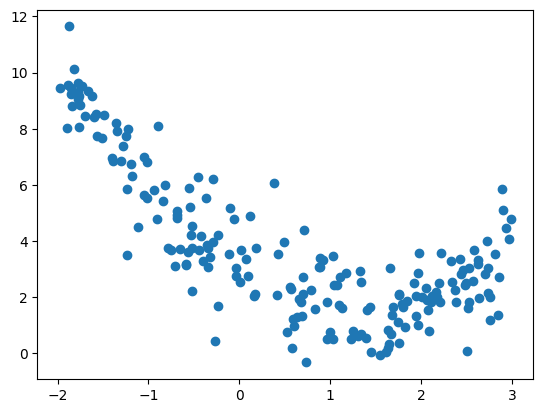

In [68]:
m = 200
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.05328e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.05328e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


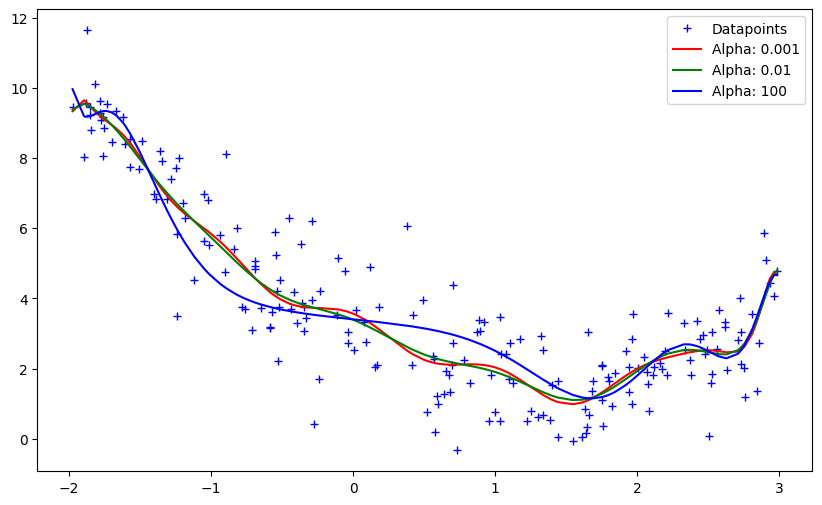

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0.001, 0.01, 100]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()